# Importando Pacotes e Dados

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
gorjetas = pd.read_csv('dados/gorjetas.csv')

## Análise do Valor da Conta e da Gorjeta

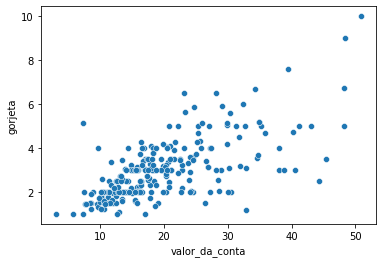

In [3]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

In [4]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))

A base de dados contém 244 registros 



## Editando gráfico

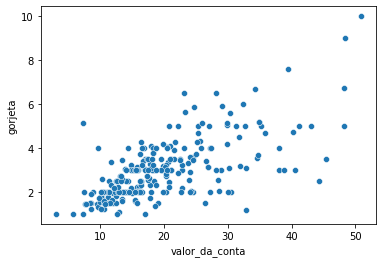

In [5]:
valor_gorjeta.get_figure()

In [6]:
valor_gorjeta.figure.suptitle('Valor da conta x Gorjeta')

Text(0.5, 0.98, 'Valor da conta x Gorjeta')

In [7]:
valor_gorjeta.set_title('Análise do valor da gorjeta em função do valor da conta')
valor_gorjeta.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')

[Text(0.5, 18.106250000000003, 'Valor da conta'),
 Text(17.200000000000003, 0.5, 'Valor da gorjeta')]

In [8]:
imagem = valor_gorjeta.get_figure()

In [9]:
imagem.savefig('imagem.png')

## Criando Porcentagem

In [10]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta'].round(2)

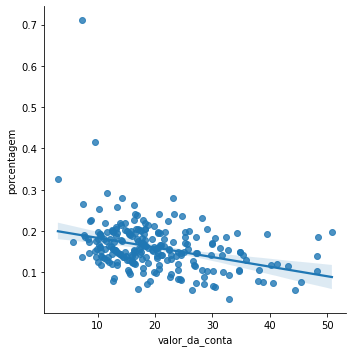

In [11]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

## Análise da Sobremesa

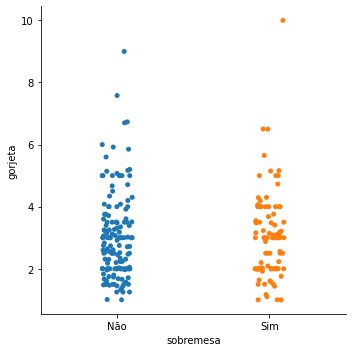

In [12]:
sns.catplot(x='sobremesa', y='gorjeta',data=gorjetas)

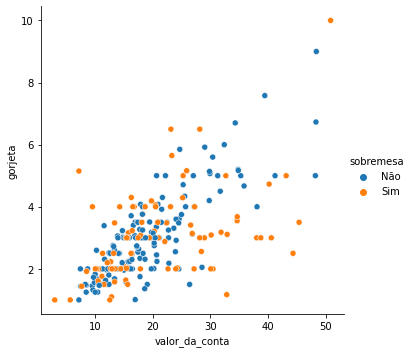

In [13]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

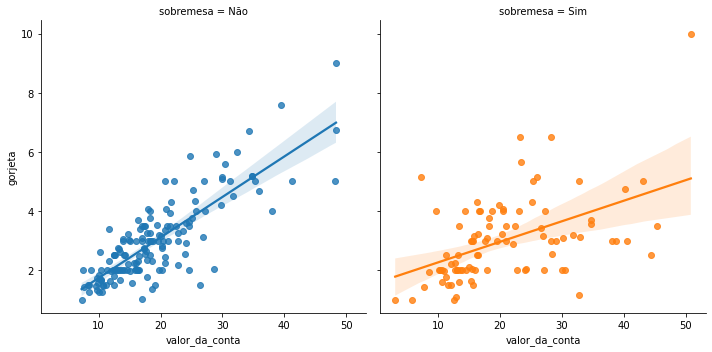

In [14]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

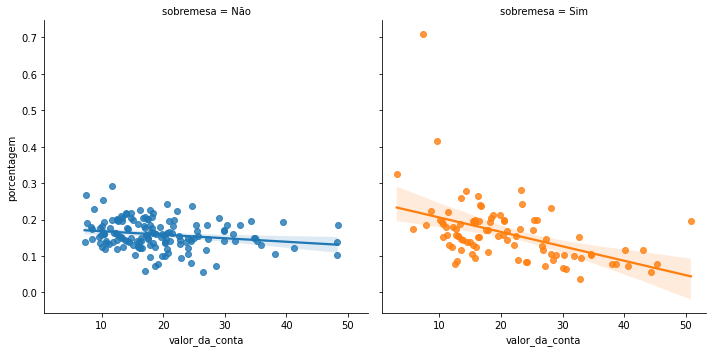

In [15]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

## Teste de Hipótese

In [16]:
from scipy.stats import ranksums

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [17]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [18]:
r = ranksums(sobremesa, sem_sobremesa)

In [19]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5601068283978767


## Análise de Dia da Semana

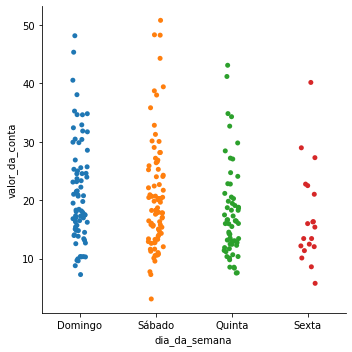

In [20]:
sns.catplot(x='dia_da_semana',y='valor_da_conta', data=gorjetas)

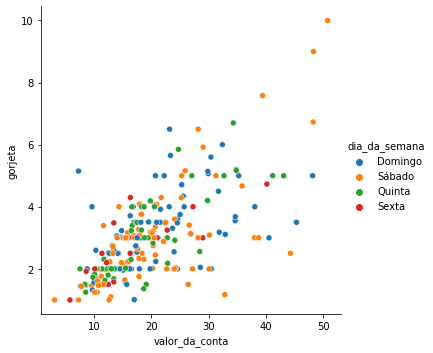

In [21]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

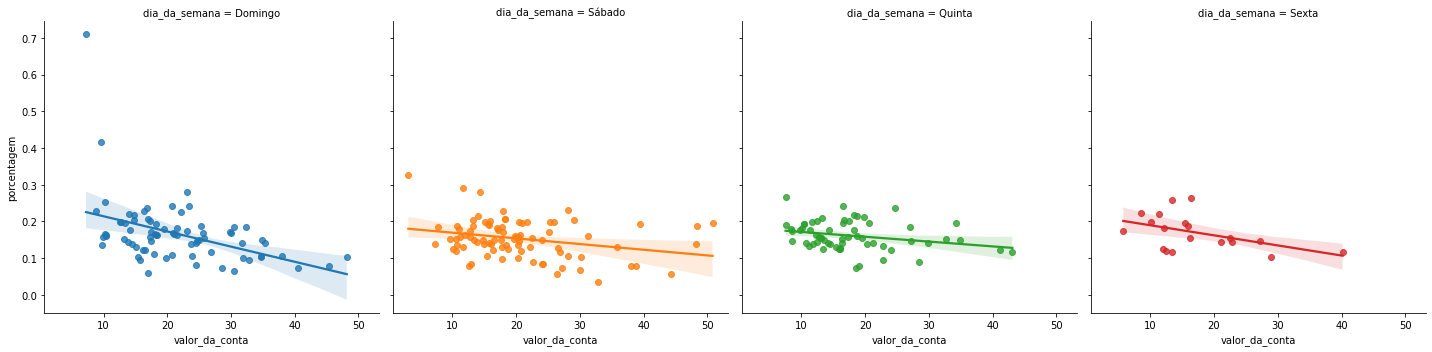

In [22]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [23]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [24]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [25]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166897
Quinta,17.682742,2.771452,0.161276
Sexta,17.151579,2.734737,0.169913
Sábado,20.441379,2.993103,0.153152


## Teste de Hipótese

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [26]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [27]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [28]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443
